## Problem 1 : Less data to train

### Solution : Data Augmentation

In [14]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Reading in the Emergency dataset

data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [16]:
# Checking the first 5 rows of the dataset

data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [17]:
# checking the shape of the dataset

data.shape

(2352, 2)

In [18]:
# Let's first check the number of images per class

data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [19]:
# Extracting the name and target of a random image in the data dataframe

random_id = 777 #index of random image 

img_name = data['image_names'].iloc[random_id]
target = data['emergency_or_not'].iloc[random_id]

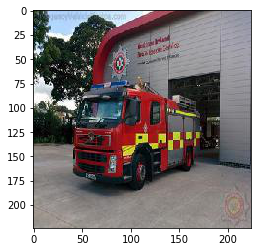

In [20]:
# Reading and plotting the random image

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

plt.imshow(img)
plt.show()

In [21]:
# Checking shape of the image

img.shape

(224, 224, 3)

In [22]:
# Importing the ImageDataGenerator for Image Augmentation

from keras.preprocessing.image import ImageDataGenerator

### Augmentations

1. rotation_range - Degree range for random rotations
2. width_shift_range - float or integer
3. height_shift_range - float or integer
4. horizontal_flip - Boolean

In [23]:
# Intializing the ImageDataGenerator object with the Augmentations that we want.

# 1. rotation_range

datagen = ImageDataGenerator(vertical_flip = True)

In [24]:
# Reshaping the image to allow for iteration

img = img.reshape((1,)+img.shape)

In [25]:
#checking the shape of the reshaped array

img.shape

(1, 224, 224, 3)

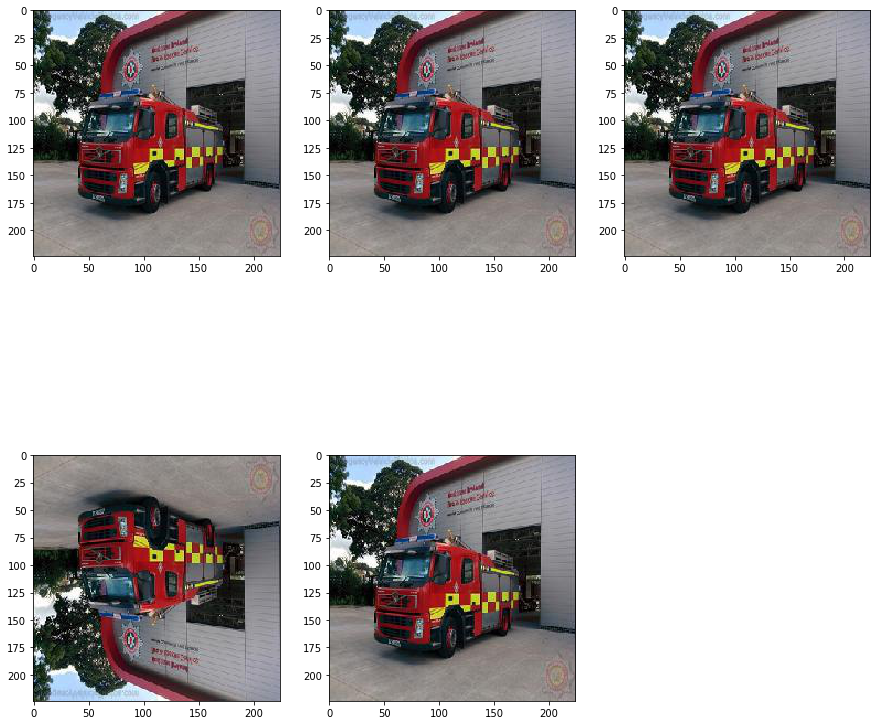

In [42]:
#Let's generate 5 randomly rotated images of our array.

f = plt.figure(figsize = (15,15))

count = 0
for x, y in datagen.flow(img,[target], batch_size=1):
    if count ==5:
        break
    
    count += 1
    f.add_subplot(230+count)
    plt.imshow(x.reshape(224,224,3).astype(int))
plt.show()